<a href="https://colab.research.google.com/github/SarraAbbessii/Project-PlantDisease/blob/main/Plantdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## seeding for reproductibility

In [ ]:
import random
random.seed(10)

import numpy as np
np.random.seed(10)

import tensorflow as tf
tf.random.set_seed(10)

## **importing the dependencies**

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers , models


## Data Curation

upload the kaggle.json file


In [ ]:
pip install kaggle

In [ ]:
kaggle_credentials= json.load(open('kaggle.json'))

In [ ]:
os.environ['KAGGLE_USERNAME']=kaggle_credentials['username']
os.environ['KAGGLE_KEY']=kaggle_credentials['key']

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 f2.jpg   kaggle.json		  plantvillage-dataset.zip   test_apple_black_rot.jpg
 f3.JPG  'plantvillage dataset'   sample_data		     treatments_with_medications.json


In [ ]:
#unzip the downloaded dataset
with ZipFile('plantvillage-dataset.zip','r') as zip_ref:
  zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'segmented', 'grayscale']
38
['Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Tomato___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
38
['Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Tomato___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
38
['Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Tomato___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']


## **Number of Classes = 38**

In [ ]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['bd7f0429-550b-4e28-95af-98e56b282437___Mt.N.V_HL 6130.JPG', '93f13053-88c2-4e0e-af52-b8057795b060___Mt.N.V_HL 8955.JPG', 'fabd2864-3431-4f44-b3bf-fa3af593fe05___Mt.N.V_HL 9002.JPG', '629195e5-85c1-444f-bd02-0fb635586d8e___Mt.N.V_HL 6079.JPG', '59ecd16e-8136-4295-93e4-0dc8755f48eb___Mt.N.V_HL 6133.JPG']


## **Data Preprocessing**

In [ ]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


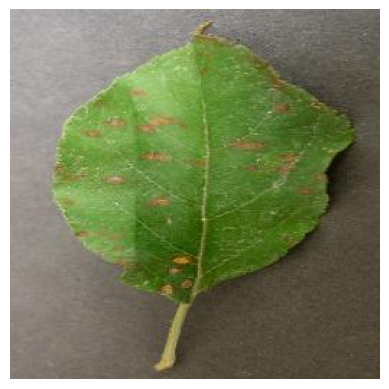

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [ ]:
# Image Parameters
img_size = 224
batch_size = 32

## **Train Test Split**

In [ ]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
    )

In [ ]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)


Found 10849 images belonging to 38 classes.


# **Convolutional Neural Network**

In [ ]:
from tensorflow.keras import layers, models, Input
from tensorflow.keras.utils import to_categorical

# Taille de l'image
img_size = 224

# Définir une entrée commune
input_layer = Input(shape=(img_size, img_size, 3))

# Couche convolutive partagée
x = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)

# Sortie 1 : Classification des maladies
disease_output = layers.Dense(38, activation='softmax', name="disease_output")(x)

# Sortie 2 : Prédiction du traitement/médicament
treatment_output = layers.Dense(38, activation='softmax', name="treatment_output")(x)

# Construire le modèle multi-sorties
model = models.Model(inputs=input_layer, outputs=[disease_output, treatment_output])

# Résumé du modèle
model.summary()

# Compilation
model.compile(
    optimizer='adam',
    loss={
        "disease_output": "categorical_crossentropy",
        "treatment_output": "categorical_crossentropy"
    },
    metrics={
        "disease_output": ["accuracy"],
        "treatment_output": ["accuracy"]
    }
)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 222, 222, 32)   │            896 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 111, 111, 32)   │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 64)   │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 54, 54, 64)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 186624)         │              0 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ disease_output (Dense)    │ (None, 38)             │      7,091,750 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ treatment_output (Dense)  │ (None, 38)             │      7,091,750 │ flatten[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 14,202,892 (54.18 MB)

 Trainable params: 14,202,892 (54.18 MB)

 Non-trainable params: 0 (0.00 B)

# **Model training**

In [ ]:
# Entraîner le modèle
history = model.fit(
    train_generator,
    epochs=10,
   validation_data=validation_generator )

# Évaluer le modèle
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc}")
#

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:678: UserWarning: Gradients do not exist for variables ['kernel', 'bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 128s 89ms/step - disease_output_accuracy: 0.6249 - loss: 1.4623 - val_disease_output_accuracy: 0.8261 - val_loss: 0.5668
Epoch 2/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 118s 76ms/step - disease_output_accuracy: 0.9165 - loss: 0.2658 - val_disease_output_accuracy: 0.8681 - val_loss: 0.4592
Epoch 3/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 105s 77ms/step - disease_output_accuracy: 0.9684 - loss: 0.1051 - val_disease_output_accuracy: 0.8715 - val_loss: 0.5093
Epoch 4/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 98s 72ms/step - disease_output_accuracy: 0.9819 - loss: 0.0570 - val_disease_output_accuracy: 0.8837 - val_loss: 0.5493
Epoch 5/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 116s 85ms/step - disease_output_accuracy: 0.9878 - loss: 0.0371 - val_disease_output_accuracy: 0.8518 - val_loss: 0.7762
Epoch 6/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 113s 83ms/step - disease_output_accuracy: 0.9845 - loss: 0.0514 - val_disease_output_accuracy: 0.8676 - val_loss: 0.7449
Epoch 7/10
1358/1358 ━━━━━━━━━━━━━

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Création des générateurs pour les ensembles d'entraînement et de validation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

# Initialisation des générateurs
train_generator = train_datagen.flow_from_directory(
    'plantvillage dataset',  # Remplacez par le chemin vers vos données d'entraînement
    target_size=(224, 224),     # Taille d'entrée du modèle
    batch_size=32,              # Taille du lot
    class_mode='categorical'    # Type de classification (multiclasse)
)

validation_generator= val_datagen.flow_from_directory(
    'plantvillage dataset',  # Chemin vers vos données de validation
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 162916 images belonging to 3 classes.
Found 162916 images belonging to 3 classes.


# **Model Evaluation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/plantvillage dataset/color',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Utilisez 'categorical' pour un encodage one-hot
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/plantvillage dataset/color',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 54305 images belonging to 38 classes.
Found 54305 images belonging to 38 classes.


In [ ]:
val_metrics = model.evaluate(
    validation_generator,
    steps=validation_generator.samples // validation_generator.batch_size,
    return_dict=True
)

# Affichez les métriques
print(val_metrics)

1697/1697 ━━━━━━━━━━━━━━━━━━━━ 150s 88ms/step - disease_output_accuracy: 0.9679 - loss: 0.2078
{'disease_output_accuracy': 0.9675714373588562, 'loss': 0.20871780812740326}


In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Evaluating model...
1697/1697 ━━━━━━━━━━━━━━━━━━━━ 145s 86ms/step - disease_output_accuracy: 0.9681 - loss: 0.2093
Validation Accuracy: 96.76%


In [ ]:
print("Clés disponibles dans history.history :", history.history.keys())


Clés disponibles dans history.history : dict_keys(['disease_output_accuracy', 'loss', 'val_disease_output_accuracy', 'val_loss'])


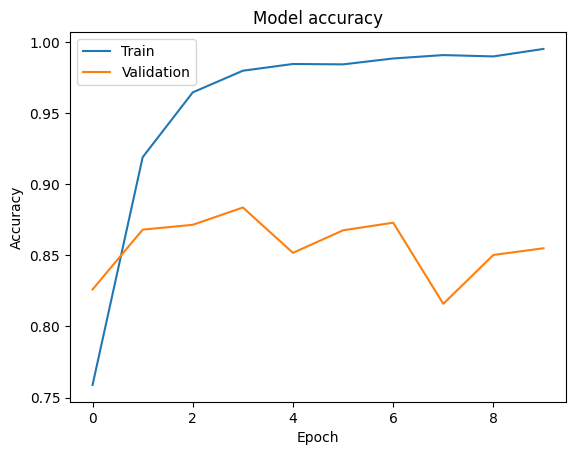

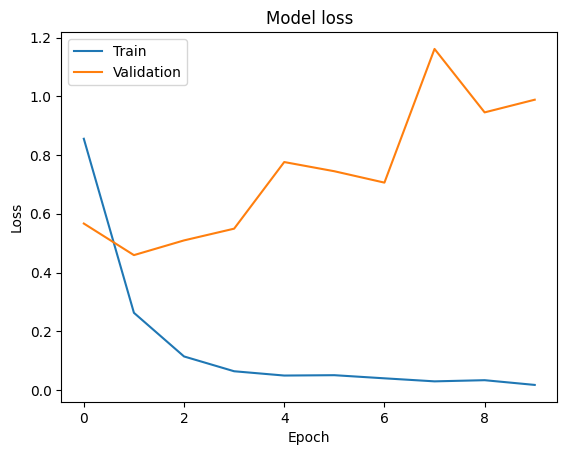

In [ ]:
import matplotlib.pyplot as plt

# Tracer l'exactitude
plt.plot(history.history['disease_output_accuracy'])
plt.plot(history.history['val_disease_output_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Tracer la perte
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image_class(model, image_path, class_indices):
    # Charger et prétraiter l'image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    preprocessed_img = np.expand_dims(img_array, axis=0)

    # Prédire avec le modèle
    predictions = model.predict(preprocessed_img)
    print("Forme des prédictions :", predictions.shape)
    print("Prédictions :", predictions)

    # Trouver l'indice de la classe prédite
    predicted_class_index = int(np.argmax(predictions, axis=1)[0])

    # Inverser class_indices pour obtenir le nom de la classe
    #indices_to_classes = {v: k for k, v in class_indices.items()}
    #predicted_class_name = indices_to_classes[predicted_class_index]

    return predicted_class_name


In [ ]:
# Mapping des indices de classes aux noms des classes
#class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
#class_indices

In [ ]:
# saving the class names as json file
#json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
# Vérifiez le contenu du fichier JSON
with open('treatments_with_medications.json', 'r') as file:
    raw_content = file.read()
    print("Contenu brut du fichier JSON :")
    print(raw_content)

Contenu brut du fichier JSON :
{
    "Apple___Black_rot": {
        "treatment": "Appliquez des fongicides pour contrôler la pourriture noire.",
        "medication": "Captane, Mancozèbe"
    },
    "Apple___Cedar_apple_rust": {
        "treatment": "Utilisez un fongicide préventif et éliminez les plantes-hôtes telles que les genévriers.",
        "medication": "Myclobutanil, Mancozèbe"
    },
    "Apple___healthy": {
        "treatment": "La plante est en bonne santé, aucun traitement n'est nécessaire.",
        "medication": "Aucun"
    },
    "Blueberry___healthy": {
        "treatment": "La plante est en bonne santé, aucun traitement n'est nécessaire.",
        "medication": "Aucun"
    },
    "Cherry_(including_sour)___Powdery_mildew": {
        "treatment": "Traitez avec des fongicides et taillez pour améliorer la circulation de l'air.",
        "medication": "Soufre, Bicarbonate de potassium"
    },
    "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot": {
        "treatment":

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Définir les générateurs de données
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Train generator
train_gen = datagen.flow_from_directory(
    'plantvillage dataset/color',
    target_size=(img_size, img_size),
    batch_size=32,
    subset='training',
    class_mode='categorical'
)

# Validation generator
val_gen = datagen.flow_from_directory(
    'plantvillage dataset/color',
    target_size=(img_size, img_size),
    batch_size=32,
    subset='validation',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [ ]:
import json

# Assurez-vous que le fichier test_treatments.json existe
json_file = 'treatments_with_medications.json'

try:
    with open(json_file, 'r') as file:
        disease_treatments = json.load(file)
        print("Fichier JSON chargé avec succès :", disease_treatments)
except json.JSONDecodeError as e:
    print(f"Erreur de décodage JSON : {e}")


Fichier JSON chargé avec succès : {'Apple___Black_rot': {'treatment': 'Appliquez des fongicides pour contrôler la pourriture noire.', 'medication': 'Captane, Mancozèbe'}, 'Apple___Cedar_apple_rust': {'treatment': 'Utilisez un fongicide préventif et éliminez les plantes-hôtes telles que les genévriers.', 'medication': 'Myclobutanil, Mancozèbe'}, 'Apple___healthy': {'treatment': "La plante est en bonne santé, aucun traitement n'est nécessaire.", 'medication': 'Aucun'}, 'Blueberry___healthy': {'treatment': "La plante est en bonne santé, aucun traitement n'est nécessaire.", 'medication': 'Aucun'}, 'Cherry_(including_sour)___Powdery_mildew': {'treatment': "Traitez avec des fongicides et taillez pour améliorer la circulation de l'air.", 'medication': 'Soufre, Bicarbonate de potassium'}, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': {'treatment': 'Appliquez des fongicides et adoptez une rotation des cultures.', 'medication': 'Propiconazole, Azoxystrobine'}, 'Corn_(maize)___healthy': {

In [ ]:
import json

json_file = "treatments_with_medications.json"

try:
    with open(json_file, 'r') as file:
        content = file.read().strip()  # Supprimer les espaces inutiles
        if not content:
            raise ValueError(f"Le fichier {json_file} est vide.")
        disease_treatments = json.loads(content)  # Charger le contenu JSON
        print("Fichier JSON chargé avec succès :", disease_treatments)
except json.JSONDecodeError as e:
    raise ValueError(f"Le fichier {json_file} contient une erreur de format JSON : {e}")
except FileNotFoundError:
    raise FileNotFoundError(f"Le fichier {json_file} n'existe pas.")
except Exception as e:
    raise ValueError(f"Une erreur inattendue s'est produite : {e}")


Fichier JSON chargé avec succès : {'Apple___Black_rot': {'treatment': 'Appliquez des fongicides pour contrôler la pourriture noire.', 'medication': 'Captane, Mancozèbe'}, 'Apple___Cedar_apple_rust': {'treatment': 'Utilisez un fongicide préventif et éliminez les plantes-hôtes telles que les genévriers.', 'medication': 'Myclobutanil, Mancozèbe'}, 'Apple___healthy': {'treatment': "La plante est en bonne santé, aucun traitement n'est nécessaire.", 'medication': 'Aucun'}, 'Blueberry___healthy': {'treatment': "La plante est en bonne santé, aucun traitement n'est nécessaire.", 'medication': 'Aucun'}, 'Cherry_(including_sour)___Powdery_mildew': {'treatment': "Traitez avec des fongicides et taillez pour améliorer la circulation de l'air.", 'medication': 'Soufre, Bicarbonate de potassium'}, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': {'treatment': 'Appliquez des fongicides et adoptez une rotation des cultures.', 'medication': 'Propiconazole, Azoxystrobine'}, 'Corn_(maize)___healthy': {

In [ ]:
import os
import json

json_file = 'treatments_with_medications.json'

# Vérifiez si le fichier existe
if not os.path.exists(json_file):
    raise FileNotFoundError(f"Le fichier {json_file} est introuvable.")

# Vérifiez si le fichier est vide
if os.path.getsize(json_file) == 0:
    raise ValueError(f"Le fichier {json_file} est vide. Ajoutez un contenu JSON valide.")

# Tentez de charger le contenu JSON
try:
    with open(json_file, 'r') as file:
        disease_treatments = json.load(file)
        print("Fichier JSON chargé avec succès :", disease_treatments)
except json.JSONDecodeError as e:
    raise ValueError(f"Le fichier {json_file} contient une erreur de format JSON : {e}")


Fichier JSON chargé avec succès : {'Apple___Black_rot': {'treatment': 'Appliquez des fongicides pour contrôler la pourriture noire.', 'medication': 'Captane, Mancozèbe'}, 'Apple___Cedar_apple_rust': {'treatment': 'Utilisez un fongicide préventif et éliminez les plantes-hôtes telles que les genévriers.', 'medication': 'Myclobutanil, Mancozèbe'}, 'Apple___healthy': {'treatment': "La plante est en bonne santé, aucun traitement n'est nécessaire.", 'medication': 'Aucun'}, 'Blueberry___healthy': {'treatment': "La plante est en bonne santé, aucun traitement n'est nécessaire.", 'medication': 'Aucun'}, 'Cherry_(including_sour)___Powdery_mildew': {'treatment': "Traitez avec des fongicides et taillez pour améliorer la circulation de l'air.", 'medication': 'Soufre, Bicarbonate de potassium'}, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': {'treatment': 'Appliquez des fongicides et adoptez une rotation des cultures.', 'medication': 'Propiconazole, Azoxystrobine'}, 'Corn_(maize)___healthy': {

In [ ]:
# Charger les traitements/médicaments
with open('treatments_with_medications.json', 'r') as file:
    disease_treatments = json.load(file)


def predict_with_treatment(image_path, model, disease_treatments, class_indices):
    from tensorflow.keras.preprocessing import image
    import numpy as np

    # Charger l'image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prédire avec le modèle
    predictions = model.predict(img_array)
    disease_class = np.argmax(predictions[0])

    # Inverser le dictionnaire pour mapper indices -> noms de classe
    indices_to_classes = {v: k for k, v in class_indices.items()}

    # Vérifier si la classe prédite existe
    if disease_class not in indices_to_classes:
        raise ValueError(f"Classe prédite inconnue : {disease_class}")

    disease_name = indices_to_classes[disease_class]

    # Obtenir les informations de traitement
    treatment_info = disease_treatments.get(disease_name, {
        "treatment": "Non disponible",
        "details": "Aucune information sur le traitement."
    })

    return disease_name, treatment_info


# Exemple d'utilisation
image_path = '/content/f3.JPG'
predicted_class, treatment_info = predict_with_treatment(image_path, model, disease_treatments, train_gen.class_indices)

print(f"Maladie : {predicted_class}")
print(f"Traitement : {treatment_info['treatment']}")
print(f"Médicament : {treatment_info['medication']}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Maladie : Apple___Black_rot
Traitement : Appliquez des fongicides pour contrôler la pourriture noire.
Médicament : Captane, Mancozèbe


In [ ]:
model.save('plant_disease_prediction_model.h5')